## Import Modules

In [8]:
import os
from numpy.random import seed
seed(888)

import tensorflow as tf
tf.random.set_seed(404)
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
def load_csv_from_zip(zip_path: str, filename: str, header=None, as_array: bool = True) -> pd.DataFrame:
    """
    Load a CSV file directly from a ZIP archive.

    Parameters
    ----------
    zip_path : str
        Path to the ZIP archive.
    filename : str
        Name of the CSV file inside the ZIP archive.
    header : int, list of int, or None, default None
        Row(s) to use as the column names. Use None to keep all rows as data.
    as_array : bool, default True
        If True, return as a NumPy array. If False, return as a DataFrame.

    Returns
    -------
    np.ndarray or pd.DataFrame
        Data in array or DataFrame format.
    """
    with zipfile.ZipFile(zip_path) as z:
        with z.open(filename) as f:
            df = pd.read_csv(f, header=header)
    return df.values if as_array else df

ZIP_PATH = "data/MNIST.zip"

x_train_all = load_csv_from_zip(ZIP_PATH, "digit_xtrain.csv")
x_test = load_csv_from_zip(ZIP_PATH, "digit_xtest.csv")
y_train_all = load_csv_from_zip(ZIP_PATH, "digit_ytrain.csv")
y_test = load_csv_from_zip(ZIP_PATH, "digit_ytest.csv")

## EDA

x_train shape: (60000, 784)
y_train shape: (60000, 1)
x_test shape: (10000, 784)
y_test shape: (10000, 1)


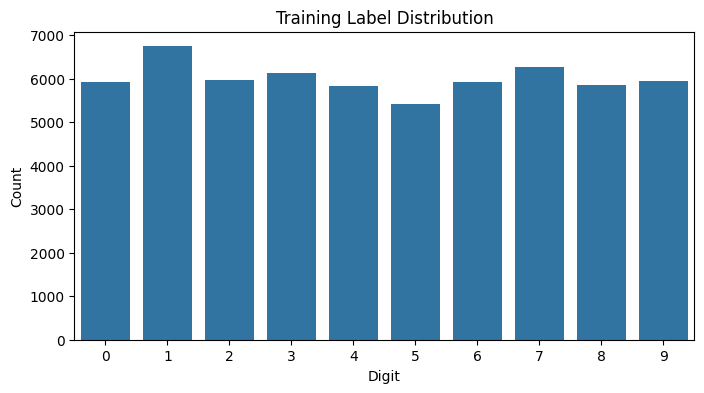

Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0
Pixel range in x_train: 0 to 255
Pixel range in x_test: 0 to 255


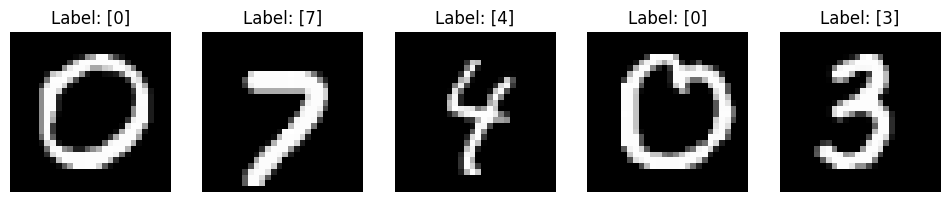

Train mean pixel value: 33.318421449829934
Train std pixel value: 78.56748998339742
Test mean pixel value: 33.791224489795916
Test std pixel value: 79.1724632222863


In [4]:
def eda_mnist(x_train, y_train, x_test, y_test, sample_size=5):
    # 1. Check shapes
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)
    print("x_test shape:", x_test.shape)
    print("y_test shape:", y_test.shape)

    # 2. Check label distribution
    plt.figure(figsize=(8, 4))
    sns.countplot(x=y_train.flatten())
    plt.title("Training Label Distribution")
    plt.xlabel("Digit")
    plt.ylabel("Count")
    plt.show()

    # 3. Check missing values
    print("Missing values in x_train:", np.isnan(x_train).sum())
    print("Missing values in y_train:", np.isnan(y_train).sum())
    print("Missing values in x_test:", np.isnan(x_test).sum())
    print("Missing values in y_test:", np.isnan(y_test).sum())

    # 4. Check pixel value ranges
    print("Pixel range in x_train:", x_train.min(), "to", x_train.max())
    print("Pixel range in x_test:", x_test.min(), "to", x_test.max())

    # 5. Show random samples
    plt.figure(figsize=(12, 3))
    indices = np.random.choice(len(x_train), sample_size, replace=False)
    for i, idx in enumerate(indices):
        img = x_train[idx].reshape(28, 28)
        plt.subplot(1, sample_size, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.title(f"Label: {y_train[idx]}")
    plt.show()

    # 6. Basic statistics
    print("Train mean pixel value:", np.mean(x_train))
    print("Train std pixel value:", np.std(x_train))
    print("Test mean pixel value:", np.mean(x_test))
    print("Test std pixel value:", np.std(x_test))

eda_mnist(x_train_all, y_train_all, x_test, y_test)

## Data Pre-processing

### Re-scale

In [5]:
# Re-scale data between 0 - 1
x_train_all, x_test = x_train_all/255.0 , x_test / 255.0

### Convert target values to one-hot encoding

In [6]:
NUM_CLASSES = 10

y_train_all = np.eye(NUM_CLASSES)[y_train_all.ravel()]
y_test = np.eye(NUM_CLASSES)[y_test.ravel()]

### Create Validation set from training data

In [7]:
VALIDATION_SIZE = 10000

x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

## MLP Model Training

2025-09-06 08:18:34.451304: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-09-06 08:18:34.568352: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 00 | Train Loss 0.3251 Acc 0.9026 | Val Loss 0.1526 Acc 0.9564


2025-09-06 08:18:35.617545: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 01 | Train Loss 0.1282 Acc 0.9620 | Val Loss 0.1058 Acc 0.9679
Epoch 02 | Train Loss 0.0870 Acc 0.9735 | Val Loss 0.0895 Acc 0.9723


2025-09-06 08:18:37.558871: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 03 | Train Loss 0.0646 Acc 0.9800 | Val Loss 0.0771 Acc 0.9769
Epoch 04 | Train Loss 0.0505 Acc 0.9839 | Val Loss 0.0729 Acc 0.9789
Epoch 05 | Train Loss 0.0408 Acc 0.9872 | Val Loss 0.0814 Acc 0.9759
Epoch 06 | Train Loss 0.0328 Acc 0.9893 | Val Loss 0.0855 Acc 0.9746


2025-09-06 08:18:41.251212: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 07 | Train Loss 0.0277 Acc 0.9911 | Val Loss 0.0791 Acc 0.9760
Epoch 08 | Train Loss 0.0248 Acc 0.9918 | Val Loss 0.0808 Acc 0.9786
Epoch 09 | Train Loss 0.0209 Acc 0.9935 | Val Loss 0.0756 Acc 0.9789
Epoch 10 | Train Loss 0.0182 Acc 0.9939 | Val Loss 0.0781 Acc 0.9790
Epoch 11 | Train Loss 0.0174 Acc 0.9938 | Val Loss 0.0852 Acc 0.9784
Epoch 12 | Train Loss 0.0163 Acc 0.9944 | Val Loss 0.0770 Acc 0.9810
Epoch 13 | Train Loss 0.0143 Acc 0.9949 | Val Loss 0.0807 Acc 0.9815
Epoch 14 | Train Loss 0.0148 Acc 0.9950 | Val Loss 0.0735 Acc 0.9821


2025-09-06 08:18:48.640037: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15 | Train Loss 0.0131 Acc 0.9952 | Val Loss 0.0832 Acc 0.9799
Epoch 16 | Train Loss 0.0125 Acc 0.9955 | Val Loss 0.0773 Acc 0.9832
Epoch 17 | Train Loss 0.0130 Acc 0.9954 | Val Loss 0.0890 Acc 0.9797
Epoch 18 | Train Loss 0.0128 Acc 0.9955 | Val Loss 0.0981 Acc 0.9790
Epoch 19 | Train Loss 0.0129 Acc 0.9956 | Val Loss 0.0845 Acc 0.9821
Epoch 20 | Train Loss 0.0109 Acc 0.9965 | Val Loss 0.1035 Acc 0.9790
Epoch 21 | Train Loss 0.0095 Acc 0.9969 | Val Loss 0.0985 Acc 0.9809
Epoch 22 | Train Loss 0.0116 Acc 0.9962 | Val Loss 0.0860 Acc 0.9823
Epoch 23 | Train Loss 0.0098 Acc 0.9966 | Val Loss 0.0988 Acc 0.9805
Epoch 24 | Train Loss 0.0127 Acc 0.9957 | Val Loss 0.1022 Acc 0.9804
Epoch 25 | Train Loss 0.0090 Acc 0.9968 | Val Loss 0.0930 Acc 0.9808
Epoch 26 | Train Loss 0.0074 Acc 0.9976 | Val Loss 0.0953 Acc 0.9811
Epoch 27 | Train Loss 0.0088 Acc 0.9969 | Val Loss 0.1002 Acc 0.9800
Epoch 28 | Train Loss 0.0102 Acc 0.9969 | Val Loss 0.1029 Acc 0.9825
Epoch 29 | Train Loss 0.0089 Acc 0

2025-09-06 08:19:04.078460: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31 | Train Loss 0.0069 Acc 0.9978 | Val Loss 0.1088 Acc 0.9814
Epoch 32 | Train Loss 0.0087 Acc 0.9971 | Val Loss 0.1041 Acc 0.9817
Epoch 33 | Train Loss 0.0075 Acc 0.9973 | Val Loss 0.1024 Acc 0.9825
Epoch 34 | Train Loss 0.0047 Acc 0.9985 | Val Loss 0.0918 Acc 0.9831
Epoch 35 | Train Loss 0.0110 Acc 0.9960 | Val Loss 0.1087 Acc 0.9818
Epoch 36 | Train Loss 0.0096 Acc 0.9969 | Val Loss 0.0955 Acc 0.9833
Epoch 37 | Train Loss 0.0046 Acc 0.9985 | Val Loss 0.1002 Acc 0.9843
Epoch 38 | Train Loss 0.0074 Acc 0.9975 | Val Loss 0.0992 Acc 0.9841
Epoch 39 | Train Loss 0.0073 Acc 0.9976 | Val Loss 0.0956 Acc 0.9843
Epoch 40 | Train Loss 0.0065 Acc 0.9978 | Val Loss 0.1062 Acc 0.9816
Epoch 41 | Train Loss 0.0069 Acc 0.9979 | Val Loss 0.1004 Acc 0.9831
Epoch 42 | Train Loss 0.0048 Acc 0.9984 | Val Loss 0.1209 Acc 0.9804
Epoch 43 | Train Loss 0.0081 Acc 0.9973 | Val Loss 0.1060 Acc 0.9821
Epoch 44 | Train Loss 0.0074 Acc 0.9977 | Val Loss 0.1083 Acc 0.9823
Epoch 45 | Train Loss 0.0091 Acc 0

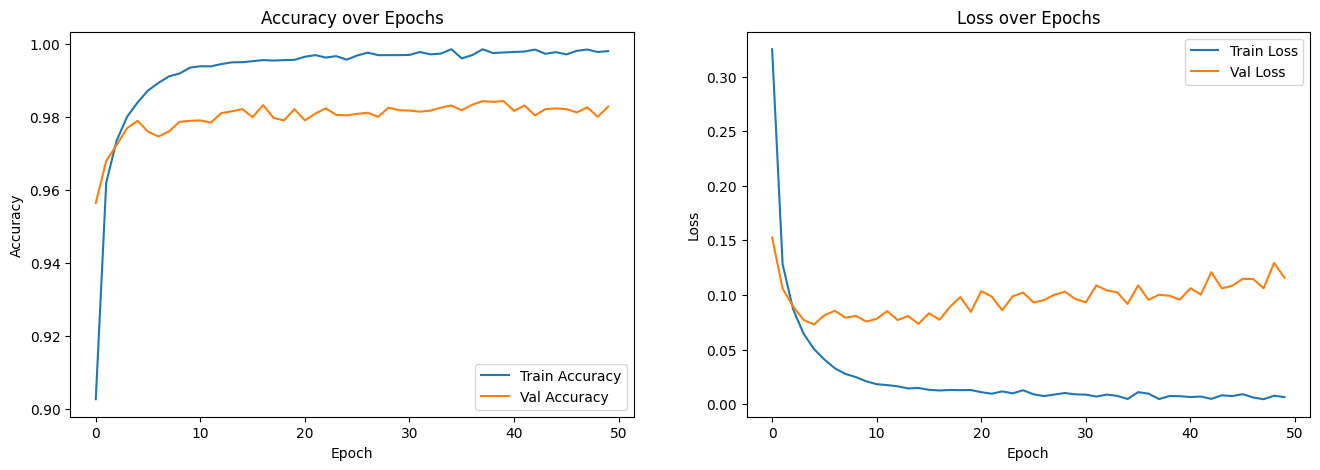

In [9]:
# ---- Model (same architecture as before) ----
num_classes = y_train.shape[1] if (y_train.ndim == 2 and y_train.shape[1] > 1) else 10
loss_obj    = keras.losses.CategoricalCrossentropy() if (y_train.ndim == 2 and y_train.shape[1] > 1) else keras.losses.SparseCategoricalCrossentropy()
train_acc   = keras.metrics.CategoricalAccuracy() if (y_train.ndim == 2 and y_train.shape[1] > 1) else keras.metrics.SparseCategoricalAccuracy()
val_acc     = keras.metrics.CategoricalAccuracy() if (y_val.ndim == 2 and y_val.shape[1] > 1) else keras.metrics.SparseCategoricalAccuracy()

model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(512, activation="relu",
                 kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1, seed=42)),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu",
                 kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1, seed=42)),
    layers.Dense(num_classes, activation="softmax",
                 kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.1, seed=42)),
])

optimizer = keras.optimizers.Adam(1e-3)
nr_epochs = 50
batch_size = 128

# ---- Data pipeline (replaces next_batch/iter loops) ----
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
val_ds   = tf.data.Dataset.from_tensor_slices((x_val,   y_val)).batch(batch_size)

# ---- TensorBoard writers (replace merged_summary/train_writer/validation_writer) ----
train_writer = tf.summary.create_file_writer("logs/custom/train")
val_writer   = tf.summary.create_file_writer("logs/custom/val")

@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred = model(x, training=True)
        loss   = loss_obj(y, y_pred)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    train_acc.update_state(y, y_pred)
    return loss

@tf.function
def val_step(x, y):
    y_pred = model(x, training=False)
    v_loss = loss_obj(y, y_pred)
    val_acc.update_state(y, y_pred)
    return v_loss

train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(nr_epochs):
    # ======== Training loop (epoch) ========
    train_acc.reset_state()
    epoch_train_loss = 0.0
    batches = 0

    for xb, yb in train_ds:
        loss = train_step(xb, yb)
        epoch_train_loss += loss
        batches += 1

    epoch_train_loss = epoch_train_loss / tf.cast(batches, tf.float32)

    # ======== Validation loop ========
    val_acc.reset_state()
    epoch_val_loss = 0.0
    vbatches = 0

    for xb, yb in val_ds:
        vloss = val_step(xb, yb)
        epoch_val_loss += vloss
        vbatches += 1

    epoch_val_loss = epoch_val_loss / tf.cast(vbatches, tf.float32)

    # ======== Write TensorBoard summaries (per epoch) ========
    with train_writer.as_default():
        tf.summary.scalar("loss", epoch_train_loss, step=epoch)
        tf.summary.scalar("accuracy", train_acc.result(), step=epoch)
    with val_writer.as_default():
        tf.summary.scalar("loss", epoch_val_loss, step=epoch)
        tf.summary.scalar("accuracy", val_acc.result(), step=epoch)

    print(f"Epoch {epoch:02d} | "
          f"Train Loss {epoch_train_loss:.4f} Acc {train_acc.result():.4f} | "
          f"Val Loss {epoch_val_loss:.4f} Acc {val_acc.result():.4f}")

    train_losses.append(float(epoch_train_loss))
    val_losses.append(float(epoch_val_loss))
    train_accs.append(float(train_acc.result()))
    val_accs.append(float(val_acc.result()))

print("Done training!")

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

# ---- Plot Loss ----
plt.subplot(1,2,2)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()

## Make a Prediction

In [11]:
from PIL import Image

zip_path = "data/MNIST.zip"

with zipfile.ZipFile(zip_path) as z:
    with z.open("test_img.png") as f:
        img = Image.open(f)
        img = img.convert("L")   

img

In [12]:
img_array = np.array(img)

# 2. Invert colors if your training data is white text on black background
img_array = np.invert(img_array)

# 3. Normalize like training data (0–1)
img_array = img_array.astype("float32") / 255.0

# 4. Reshape to match model input
test_img = img_array.reshape(1, 28*28) 

# 5. Predict
probs = model.predict(test_img)  # shape (1, 10)
pred = np.argmax(probs, axis=1)

print(f"Prediction for test image is {pred[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction for test image is 2


## Testing and Evaluation

Test accuracy: 0.9818 | Test loss: 0.1266


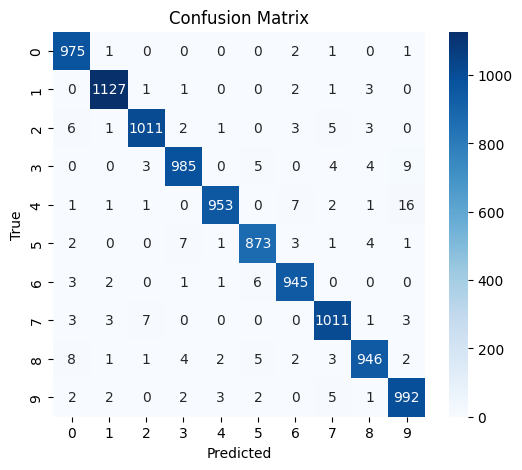

              precision    recall  f1-score   support

           0     0.9750    0.9949    0.9848       980
           1     0.9903    0.9930    0.9916      1135
           2     0.9873    0.9797    0.9835      1032
           3     0.9830    0.9752    0.9791      1010
           4     0.9917    0.9705    0.9810       982
           5     0.9798    0.9787    0.9792       892
           6     0.9803    0.9864    0.9834       958
           7     0.9787    0.9835    0.9811      1028
           8     0.9823    0.9713    0.9768       974
           9     0.9688    0.9832    0.9759      1009

    accuracy                         0.9818     10000
   macro avg     0.9817    0.9816    0.9816     10000
weighted avg     0.9819    0.9818    0.9818     10000



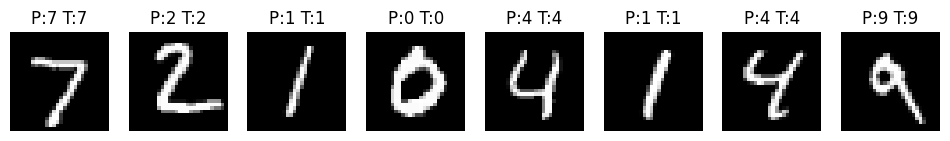

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1) compile for evaluation (pick the correct loss by your label format)
is_one_hot = (y_train.ndim == 2 and y_train.shape[1] > 1)
loss_name  = "categorical_crossentropy" if is_one_hot else "sparse_categorical_crossentropy"

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss=loss_name,
              metrics=["accuracy"])

# 2) evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")

# 3) predictions
probs = model.predict(x_test, verbose=0)         # (N, num_classes)
preds = probs.argmax(axis=1)
true  = y_test.argmax(axis=1) if is_one_hot else y_test.reshape(-1)

# 4) confusion matrix & report
cm = confusion_matrix(true, preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

print(classification_report(true, preds, digits=4))

# 5) visualize a few predictions
plt.figure(figsize=(12,3))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.axis("off")
    plt.title(f"P:{preds[i]} T:{true[i]}")
plt.show()
